Experiment 2
Generation of Pulse Code Modulation and its reconstruction.

In [31]:
# Libraries Required for the given experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd

In [32]:
#functions
# The purpose of this function is to 
def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

# The purpose of this function is to provide with the quantized value of the signal
def Uniform_quantizater(input, level):
    step_size = 2 * max(input) / (level-1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal

# The purpose of this function is to calculate SQNR through plot
def SQNR(signal_1, signal_2):
    signal_power = np.mean(signal_1**2)
    noise_power = np.mean((signal_1 - signal_2)**2)
    return 10 * np.log10(signal_power / noise_power)

def SQNR_theo(level):
    bits = np.log2(level)
    return (6 *bits) + 1.76



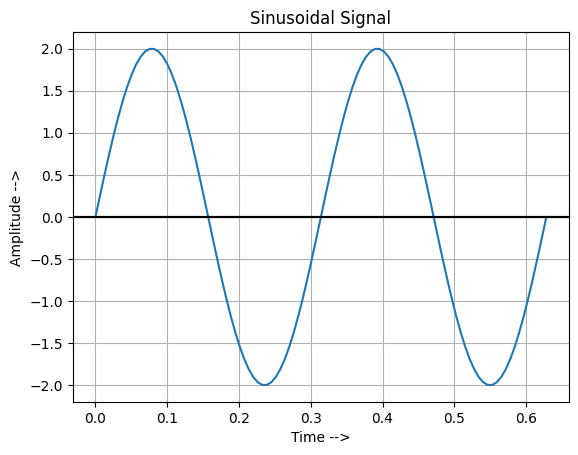

In [33]:
#Sinusoidal Signal
Amp = 2   #Amplitude of the sinusoidal signal
W_ss = 10 #Frequency of the sinusoidal signal

W_sampling = 1000 # According to Nyquist criteria W_samling>=2*W_ss

f_sampling = W_sampling / (2 * np.pi) 
T_sampling = 1 / f_sampling
t = np.arange(0, 100 * T_sampling, T_sampling)

#input signal
X = Amp * np.sin(2 * W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
# plt.legend()

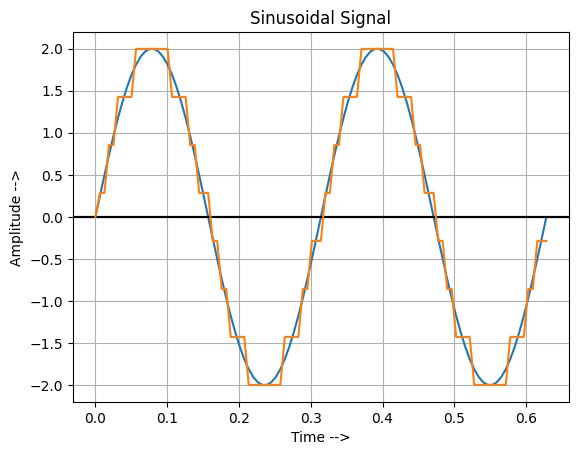

In [34]:

X = Amp * np.sin(2 * W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.axhline(y = 0, color = 'k')
# plt.legend()

# Quantized level
Quantized_signal = Uniform_quantizater(X,8)
plt.plot(t,Quantized_signal)

In [35]:
quantized_signal_df = pd.DataFrame(Quantized_signal)
quantized_signal_df = quantized_signal_df.drop_duplicates().reset_index(drop=True)
quantized_signal_df = quantized_signal_df.drop(0)
quantized_signal_df

,0
1,0.285150
2,0.855451
3,1.425752
4,1.996053
5,-0.285150
6,-0.855451
7,-1.425752
8,-1.996053


In [36]:
# SQNR
practical_SQNR = SQNR(X ,Quantized_signal)
print(practical_SQNR)
theoretical_SQNR = SQNR_theo(8)
print(theoretical_SQNR)
Error = theoretical_SQNR - practical_SQNR
print(Error)

19.128733538403804
19.76
0.6312664615961978
